# Importing packages

In [3]:
import numpy as np 
import idx2numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# To make sure random numbers are reproducible 
np.random.seed(28)

## Defining Helper functions

In [4]:
def get_file(path):
    '''
    :param path: Full path of the file
    :return: 
    file: Converted into numpy array
    '''
    with open(path, 'rb') as f:
        file = idx2numpy.convert_from_file(f)

    return file

def softmax(Z):
    '''
    :param Z: Z= wx+b
    :return:
    Output value using Softmax function
    '''
    expZ = np.exp(Z-np.max(Z))
    return expZ / np.sum(expZ)

def mean_squared_error(y, predicted):
    '''
    :param y:  Ground Truth
    :param predicted: Output of the model
    :return:
    MSE between ground truth and output
    '''
    sum_square_error = 0.0
    for i in range(len(y)):
        sum_square_error += (y[i] - predicted[i])**2.0
    mean_square_error = 1.0 / len(y) * sum_square_error
    return mean_square_error

def plot_loss(costs):
    '''
    :param costs: List of loss after every 100 epoch
    :return:
    plots loss w.r.t iteration
    '''
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.show()

## Import Training Files from local directory

In [5]:
training_images = get_file('data/mnist/raw/train-images-idx3-ubyte')
training_label = get_file('data/mnist/raw/train-labels-idx1-ubyte')


## Check and visualize the data

(60000, 28, 28)
(60000,)
2


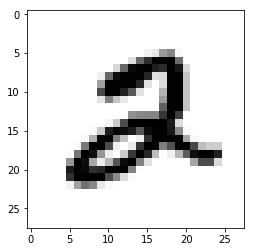

In [6]:
print(training_images.shape)
print(training_label.shape)

# Let's check an image
img_idx = 5
plt.imshow(training_images[img_idx], cmap=plt.cm.binary)
print(training_label[img_idx])

## Data pre-processing

In [7]:
# Reshape training images to (60000,784)
training_images = np.reshape(training_images,(60000,784))
print(training_images.shape)

#  OneHot encoding for labels
enc = OneHotEncoder(sparse=False, categories='auto')
training_label = enc.fit_transform(training_label.reshape(len(training_label), -1))

(60000, 784)


## Initializing parameters

In [8]:
n_features = training_images.shape[1] # 784
n_output =10
# Initializing 0-mean Weight 
w = 2* np.random.random((n_features,n_output)) -1  # (784, 10)
bias = np.zeros((1,n_output)) # (1, 10)

## Initializing hyperparameters and Training

Epoch: 0 
Loss: 0.10500000000000001
Epoch: 100 
Loss: 0.095
Epoch: 200 
Loss: 0.095
Epoch: 300 
Loss: 0.095
Epoch: 400 
Loss: 0.095
Epoch: 500 
Loss: 0.095
Epoch: 600 
Loss: 0.095
Epoch: 700 
Loss: 0.095
Epoch: 800 
Loss: 0.095
Epoch: 900 
Loss: 0.095
[0.10500000000000001, 0.095, 0.095, 0.095, 0.095, 0.095, 0.095, 0.095, 0.095, 0.095]


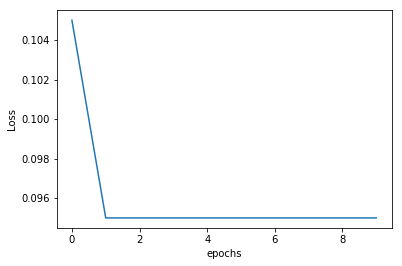

In [10]:
minibatch_size =20 
end_idx =training_images.shape[0]
lr = 0.01
losses=[]

for epoch in range(0,1000):
    for i in range(0, end_idx, minibatch_size):
        # Create minibatch with given size in pairs as (training_images,training_label)
        X_train_mini = training_images[i:i + minibatch_size]
        y_train_mini = training_label[i:i + minibatch_size]
        # Forward propagation
        score = np.dot(X_train_mini,w)+bias
        predict = softmax(score)        
        #Loss
        loss = np.mean(mean_squared_error(y_train_mini,predict))
        #Backpropagation
        d_loss= predict - y_train_mini
        d_soft = np.multiply(predict,(1-predict))
        d_z = np.multiply(d_loss, d_soft)
        
        ## Weight update
        w -=  lr *np.dot(X_train_mini.T, d_z ) / minibatch_size
                        
    if(epoch % 100 ==0):
        losses.append(loss)
        print("Epoch: "+ str(epoch)+ " \nLoss: "+str(loss))

            
print(losses)
    
plot_loss(losses)    